In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/My Drive/Thesis/Processing"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Thesis/Processing


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
BoxPlotSource = pd.read_csv("BoxPlotSource2.csv")

Brightness_System1 = BoxPlotSource['Brightness - System 1']
Brightness_System2 = BoxPlotSource['Brightness - System 2']
Brightness_System3 = BoxPlotSource['Brightness - System 3']
Brightness_System4 = BoxPlotSource['Brightness - System 4']

Bass_System1 = np.array(BoxPlotSource['Bass Balance - System 1'])
Bass_System2 = np.array(BoxPlotSource['Bass Balance - System 2'])
Bass_System3 = np.array(BoxPlotSource['Bass Balance - System 3'])
Bass_System4 = np.array(BoxPlotSource['Bass Balance - System 4'])

LR_System1 = np.array(BoxPlotSource['Left-Right Balance - System 1'])
LR_System2 = np.array(BoxPlotSource['Left-Right Balance - System 2'])
LR_System3 = np.array(BoxPlotSource['Left-Right Balance - System 3'])
LR_System4 = np.array(BoxPlotSource['Left-Right Balance - System 4'])

Stereo_System1 = np.array(BoxPlotSource['Stereo Width - System 1'])
Stereo_System2 = np.array(BoxPlotSource['Stereo Width - System 2'])
Stereo_System3 = np.array(BoxPlotSource['Stereo Width - System 3'])
Stereo_System4 = np.array(BoxPlotSource['Stereo Width - System 4'])

Clarity_System1 = np.array(BoxPlotSource['Clarity - System 1'])
Clarity_System2 = np.array(BoxPlotSource['Clarity - System 2'])
Clarity_System3 = np.array(BoxPlotSource['Clarity - System 3'])
Clarity_System4 = np.array(BoxPlotSource['Clarity - System 4'])

In [ ]:
def splitList(list,room):
  array=np.hsplit(np.array(list),3)[room-1]
  return tuple(map(tuple, array))


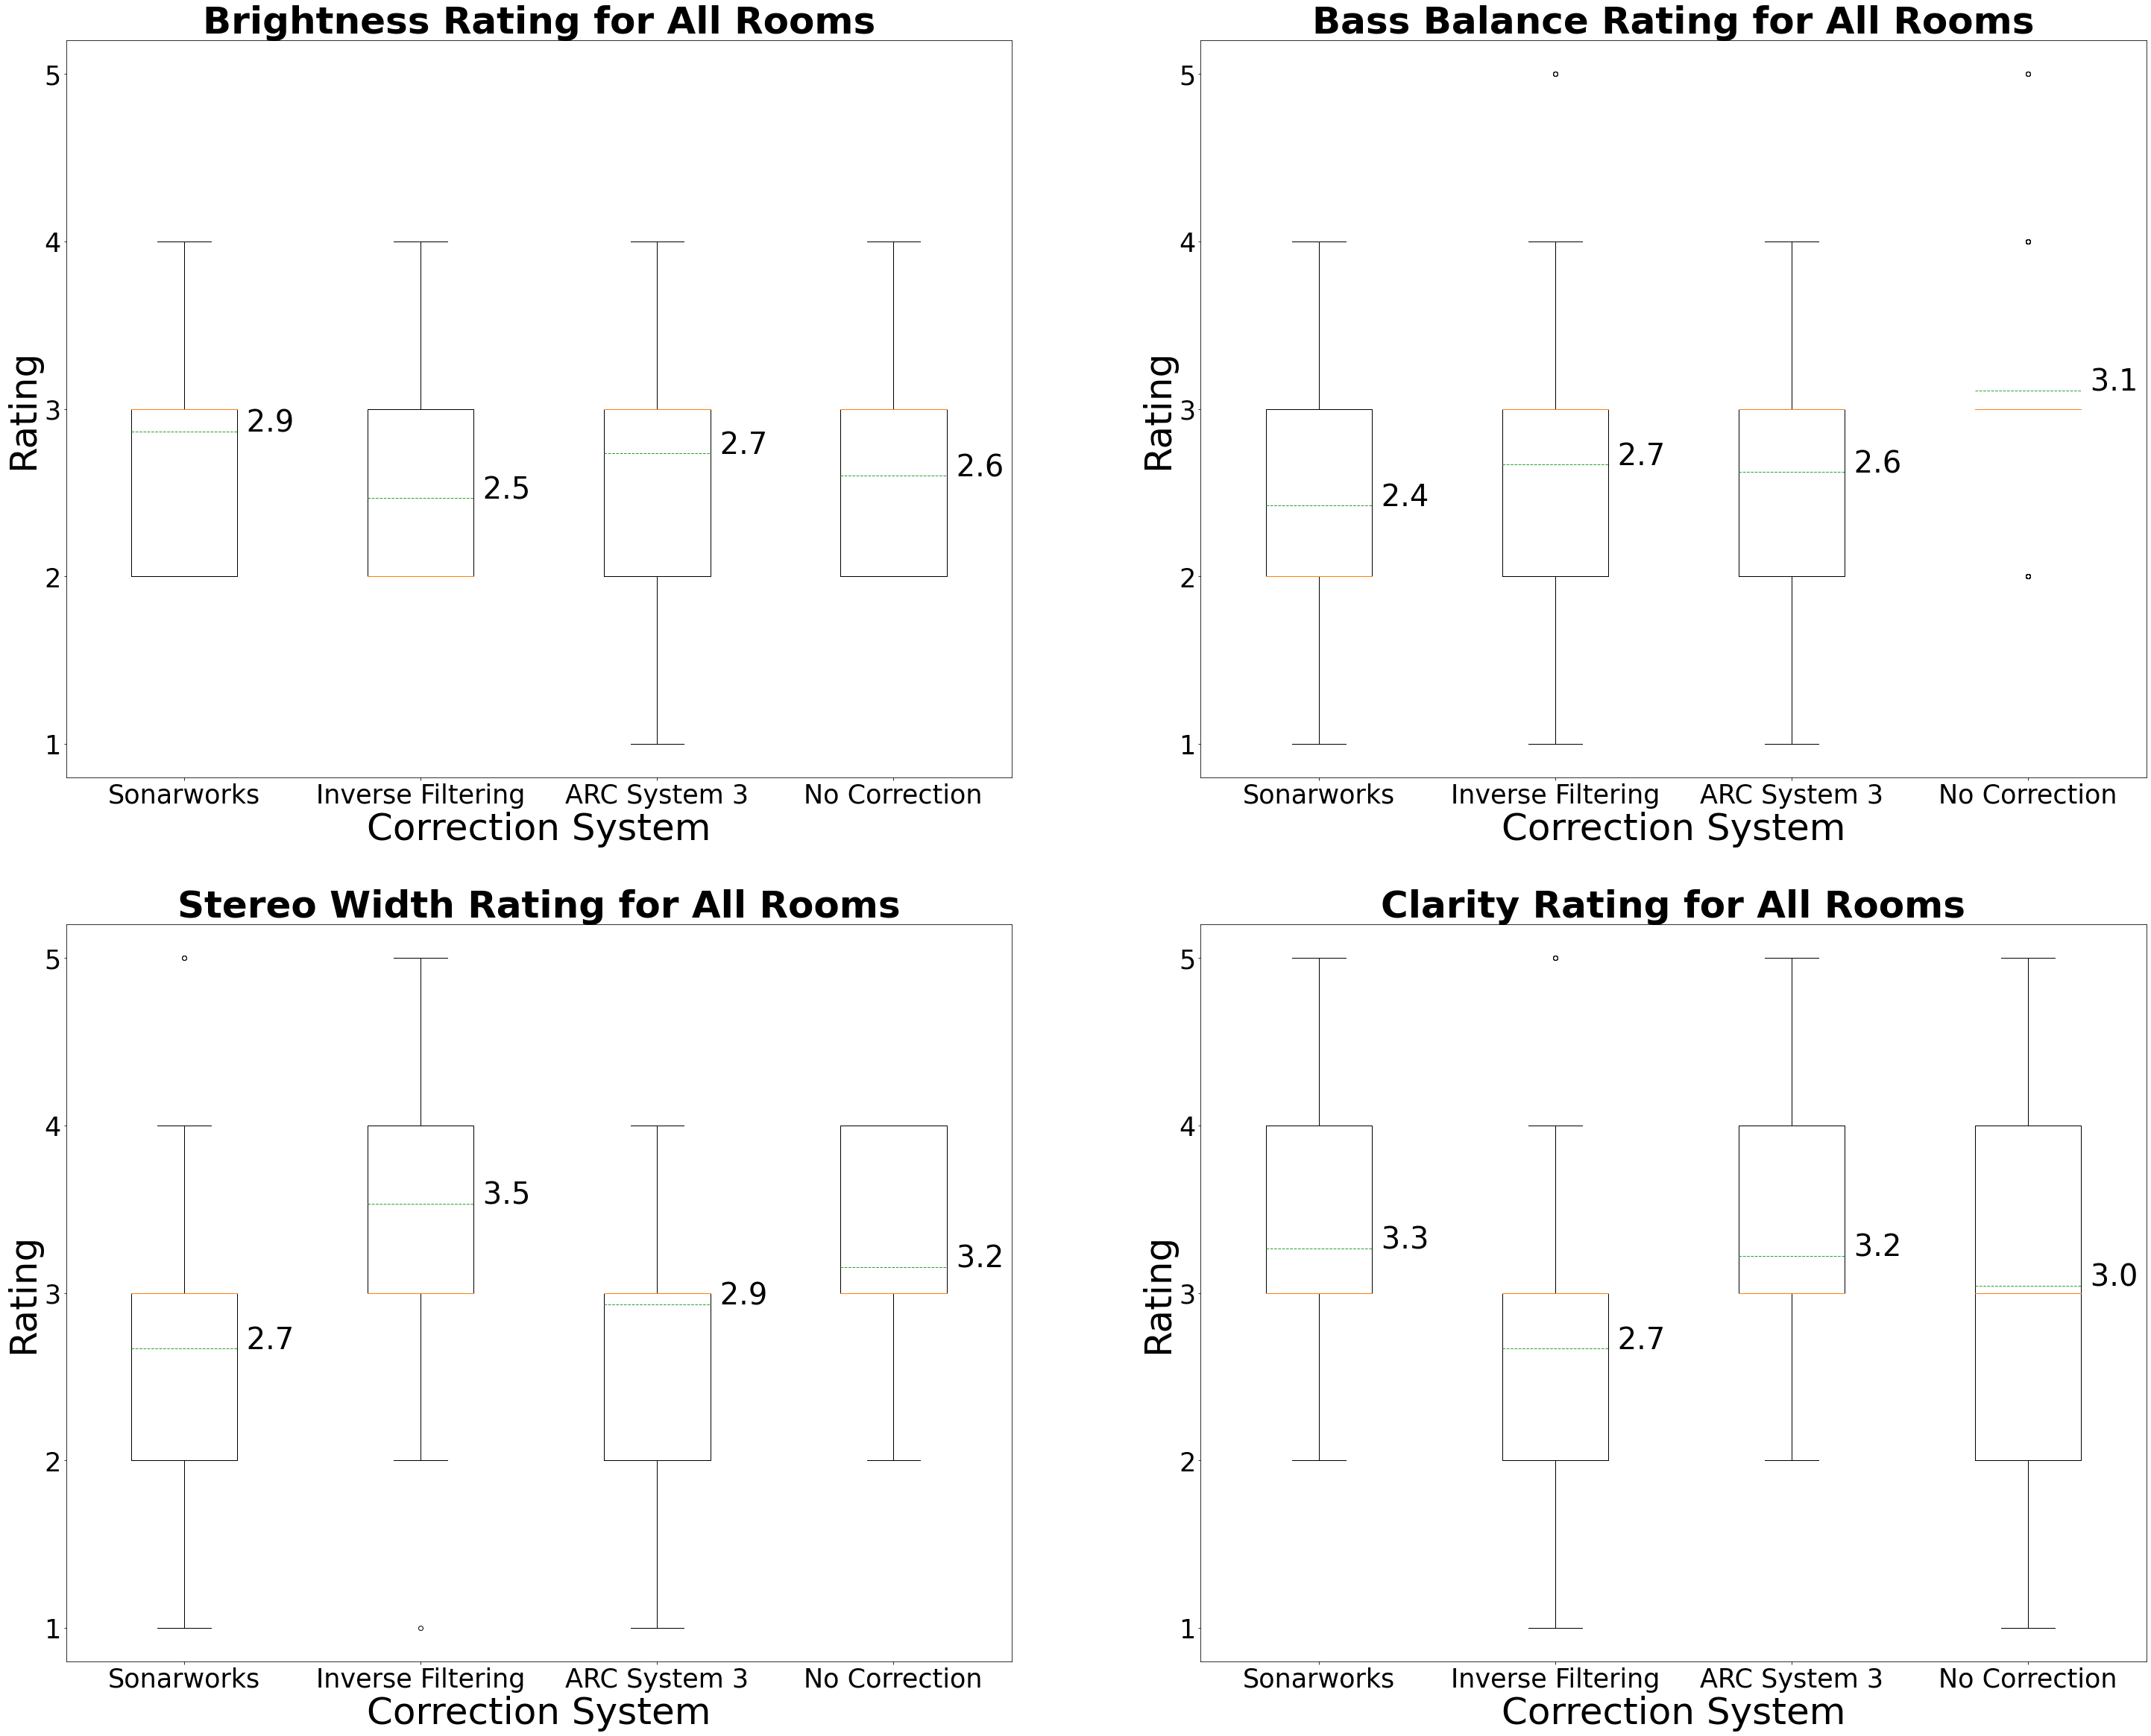

In [ ]:
import matplotlib.ticker as ticker
from pylab import *

Brightness = [Brightness_System1,Brightness_System2,Brightness_System3,Brightness_System4]
Bass = [Bass_System1,Bass_System2,Bass_System3,Bass_System4]
Stereo = [Stereo_System1,Stereo_System2,Stereo_System3,Stereo_System4]
Clarity = [Clarity_System1,Clarity_System2,Clarity_System3,Clarity_System4]
labels = ['Sonarworks', 'Inverse Filtering', 'ARC System 3', 'No Correction']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(50, 40))

# rectangular box plot
brightMeans=np.mean(Brightness,axis=1)
bplot1 = ax1.boxplot(Brightness,
                     vert=True,  # vertical box alignment
                     showmeans=True,meanline=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax1.set_title('Brightness Rating for All Rooms',fontweight="bold", size=50)

count=0
for line in bplot1['means']:
    # get position data for median line
    x, y = line.get_xydata()[1] # top of median line
    # overlay median value
    ax1.text(x, y, ' %.1f' % brightMeans[count],
         horizontalalignment='left',fontsize = 40.0) # draw above, centered
    count=count+1

bassMeans=np.mean(Bass,axis=1)
bplot2 = ax2.boxplot(Bass,
                     vert=True,  # vertical box alignment
                     showmeans=True,meanline=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax2.set_title('Bass Balance Rating for All Rooms',fontweight="bold", size=50)

count=0
for line in bplot2['means']:
    # get position data for median line
    x, y = line.get_xydata()[1] # top of median line
    # overlay median value
    ax2.text(x, y, ' %.1f' % bassMeans[count],
         horizontalalignment='left',fontsize = 40.0) # draw above, centered
    count=count+1


stereoMeans=np.mean(Stereo,axis=1)
bplot3 = ax3.boxplot(Stereo,
                     vert=True,  # vertical box alignment
                     showmeans=True,meanline=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax3.set_title('Stereo Width Rating for All Rooms',fontweight="bold", size=50)

count=0
for line in bplot3['means']:
    # get position data for median line
    x, y = line.get_xydata()[1] # top of median line
    # overlay median value
    ax3.text(x, y, ' %.1f' % stereoMeans[count],
         horizontalalignment='left',fontsize = 40.0) # draw above, centered
    count=count+1


clarityMeans=np.mean(Clarity,axis=1)
bplot4 = ax4.boxplot(Clarity,
                     vert=True,  # vertical box alignment
                     showmeans=True,meanline=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax4.set_title('Clarity Rating for All Rooms',fontweight="bold", size=50)

count=0
for line in bplot4['means']:
    # get position data for median line
    x, y = line.get_xydata()[1] # top of median line
    # overlay median value
    ax4.text(x, y, ' %.1f' % clarityMeans[count],
         horizontalalignment='left',fontsize = 40.0) # draw above, centered
    count=count+1


for ax in [ax1, ax2, ax3, ax4]:
    ax.yaxis.grid(False)
    ax.set_xlabel('Correction System',fontsize = 50.0)
    ax.set_ylabel('Rating',fontsize = 50.0)
    ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=35)
    ax.axis(ymin=0.8,ymax=5.2)

plt.savefig('Plots For All Rooms.png',dpi=400)

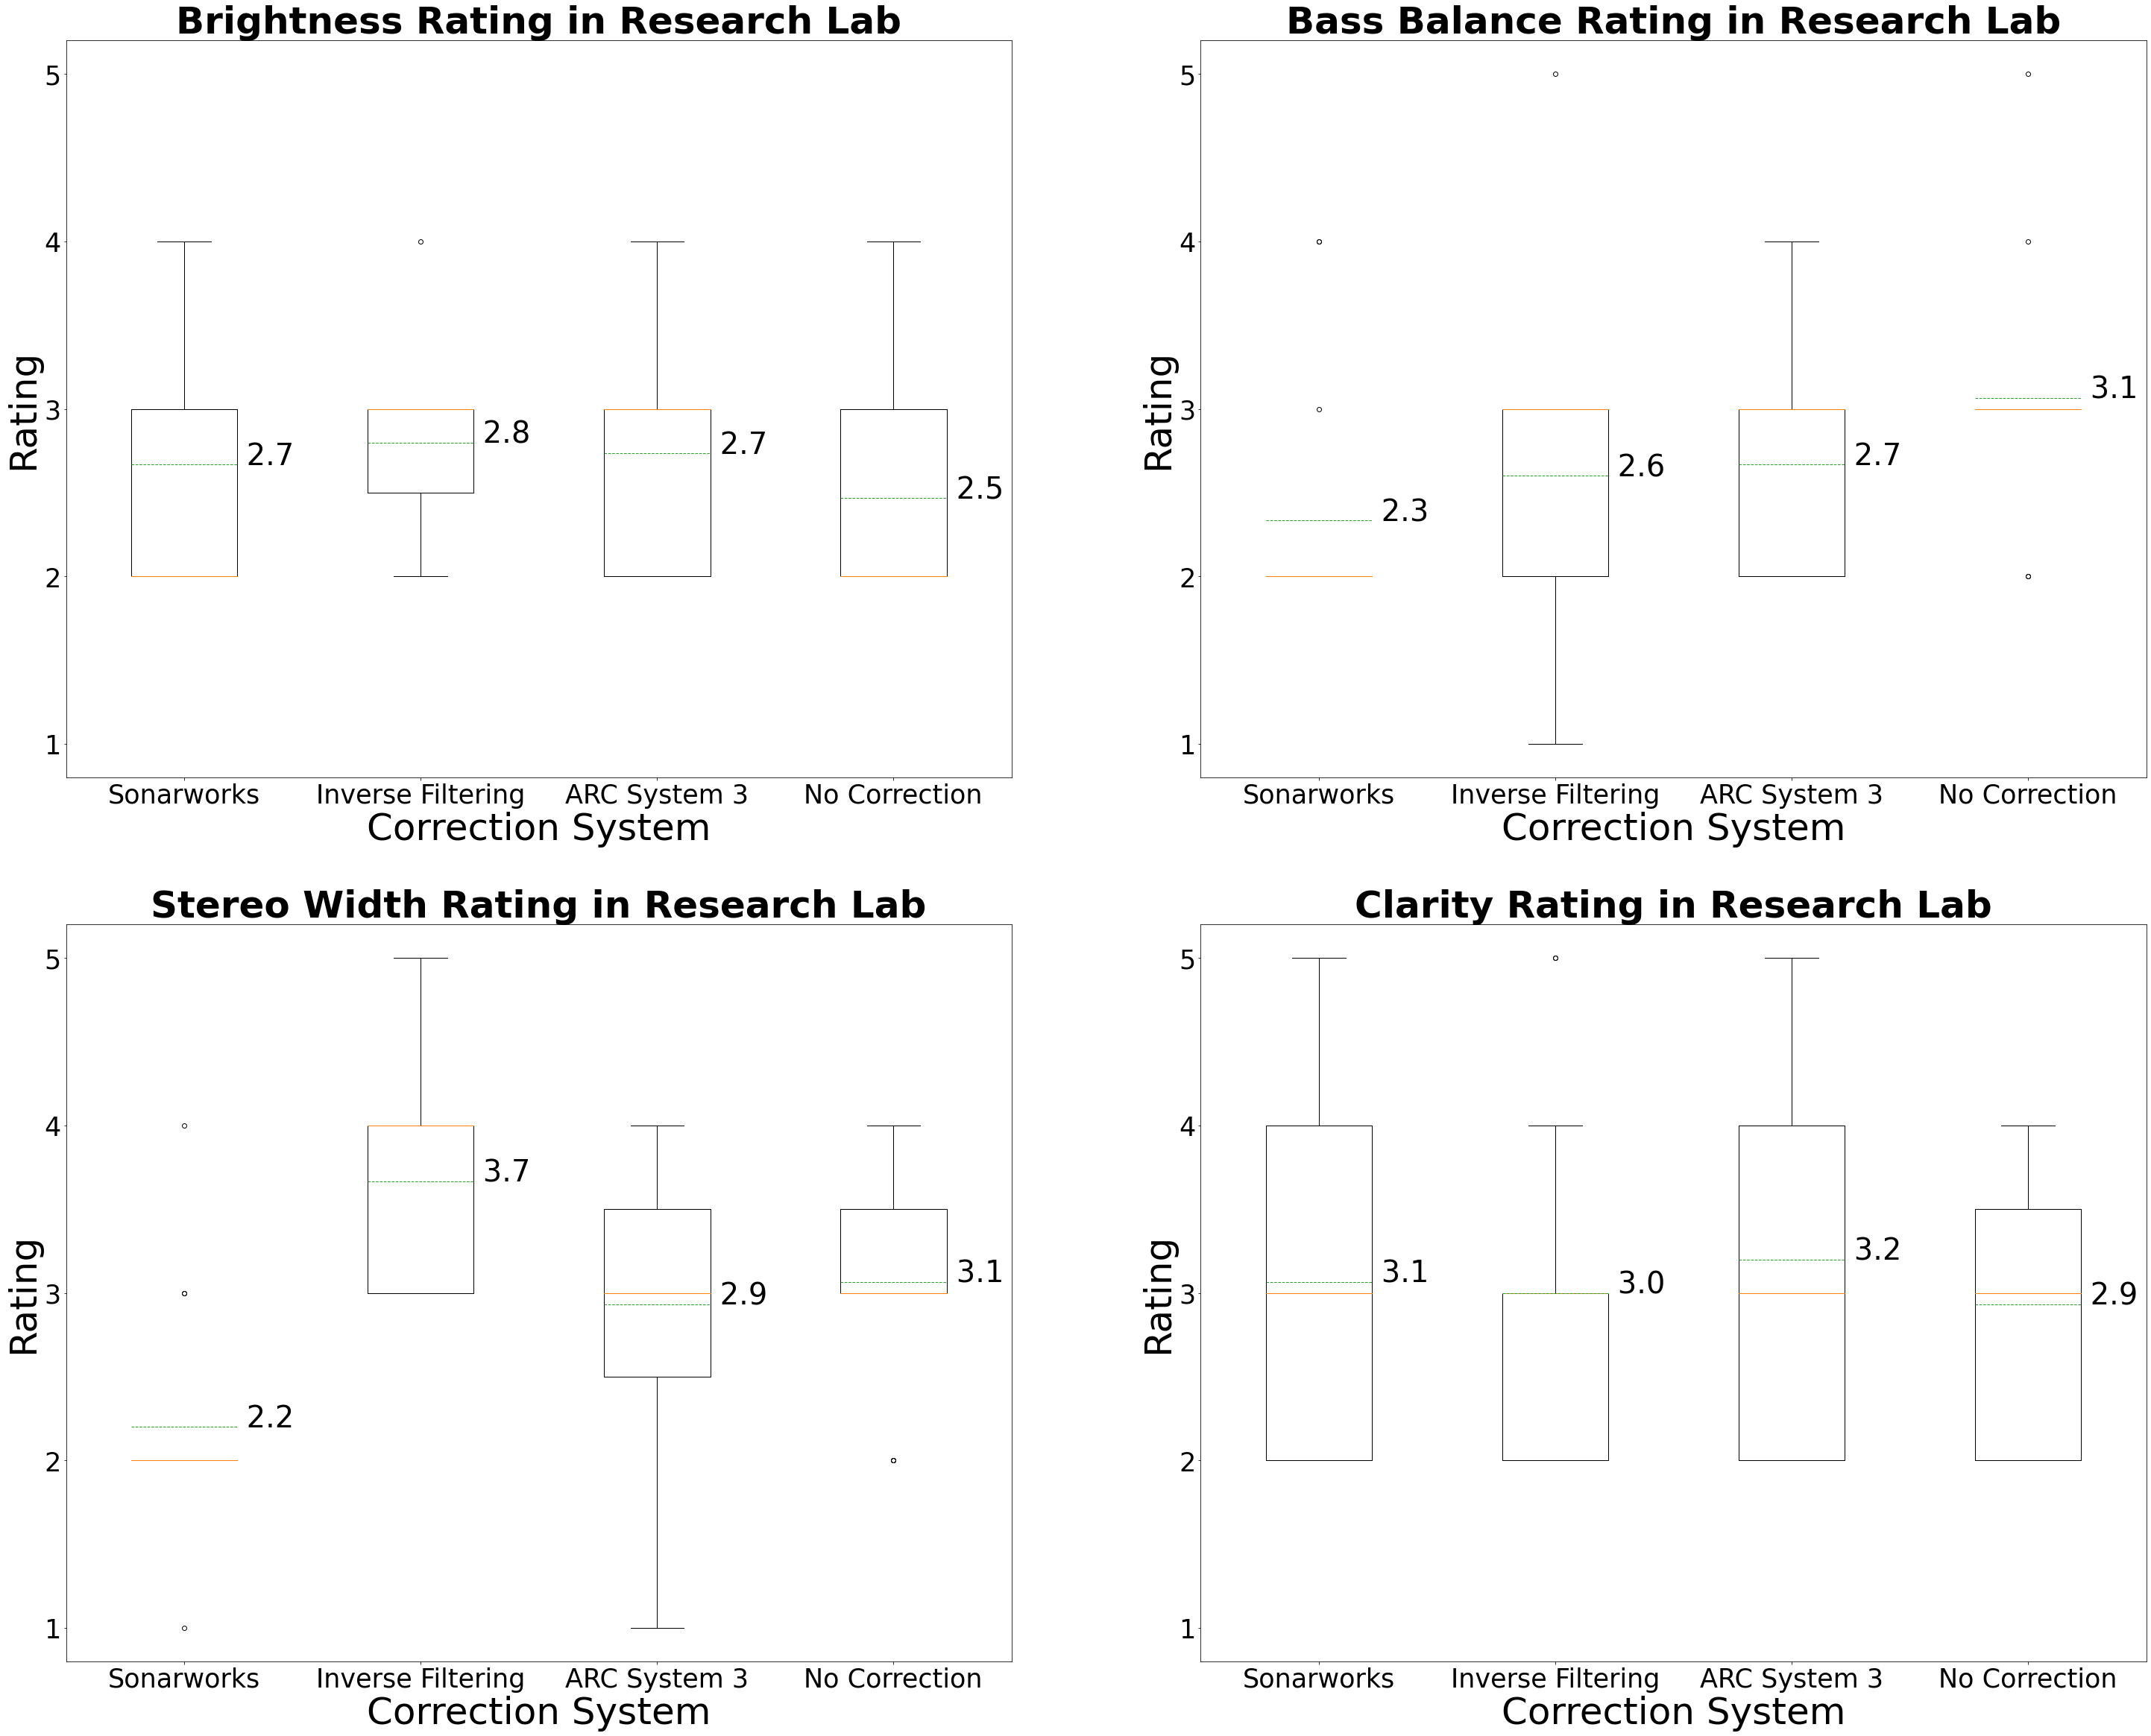

In [ ]:
import matplotlib.ticker as ticker
from pylab import *

Brightness = [Brightness_System1,Brightness_System2,Brightness_System3,Brightness_System4]
Brightness = splitList(Brightness,1)
Bass = [Bass_System1,Bass_System2,Bass_System3,Bass_System4]
Bass = splitList(Bass,1)
Stereo = [Stereo_System1,Stereo_System2,Stereo_System3,Stereo_System4]
Stereo = splitList(Stereo,1)
Clarity = [Clarity_System1,Clarity_System2,Clarity_System3,Clarity_System4]
Clarity = splitList(Clarity,1)
labels = ['Sonarworks', 'Inverse Filtering', 'ARC System 3', 'No Correction']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(50, 40))

# rectangular box plot
brightMeans=np.mean(Brightness,axis=1)
bplot1 = ax1.boxplot(Brightness,
                     vert=True,  # vertical box alignment
                     showmeans=True,meanline=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax1.set_title('Brightness Rating in Research Lab',fontweight="bold", size=50)

count=0
for line in bplot1['means']:
    # get position data for median line
    x, y = line.get_xydata()[1] # top of median line
    # overlay median value
    ax1.text(x, y, ' %.1f' % brightMeans[count],
         horizontalalignment='left',fontsize = 40.0) # draw above, centered
    count=count+1

bassMeans=np.mean(Bass,axis=1)
bplot2 = ax2.boxplot(Bass,
                     vert=True,  # vertical box alignment
                     showmeans=True,meanline=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax2.set_title('Bass Balance Rating in Research Lab',fontweight="bold", size=50)

count=0
for line in bplot2['means']:
    # get position data for median line
    x, y = line.get_xydata()[1] # top of median line
    # overlay median value
    ax2.text(x, y, ' %.1f' % bassMeans[count],
         horizontalalignment='left',fontsize = 40.0) # draw above, centered
    count=count+1


stereoMeans=np.mean(Stereo,axis=1)
bplot3 = ax3.boxplot(Stereo,
                     vert=True,  # vertical box alignment
                     showmeans=True,meanline=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax3.set_title('Stereo Width Rating in Research Lab',fontweight="bold", size=50)

count=0
for line in bplot3['means']:
    # get position data for median line
    x, y = line.get_xydata()[1] # top of median line
    # overlay median value
    ax3.text(x, y, ' %.1f' % stereoMeans[count],
         horizontalalignment='left',fontsize = 40.0) # draw above, centered
    count=count+1


clarityMeans=np.mean(Clarity,axis=1)
bplot4 = ax4.boxplot(Clarity,
                     vert=True,  # vertical box alignment
                     showmeans=True,meanline=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax4.set_title('Clarity Rating in Research Lab',fontweight="bold", size=50)

count=0
for line in bplot4['means']:
    # get position data for median line
    x, y = line.get_xydata()[1] # top of median line
    # overlay median value
    ax4.text(x, y, ' %.1f' % clarityMeans[count],
         horizontalalignment='left',fontsize = 40.0) # draw above, centered
    count=count+1


for ax in [ax1, ax2, ax3, ax4]:
    ax.yaxis.grid(False)
    ax.set_xlabel('Correction System',fontsize = 50.0)
    ax.set_ylabel('Rating',fontsize = 50.0)
    ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=35)
    ax.axis(ymin=0.8,ymax=5.2)

plt.savefig('Plots For Research Lab.png',dpi=400)

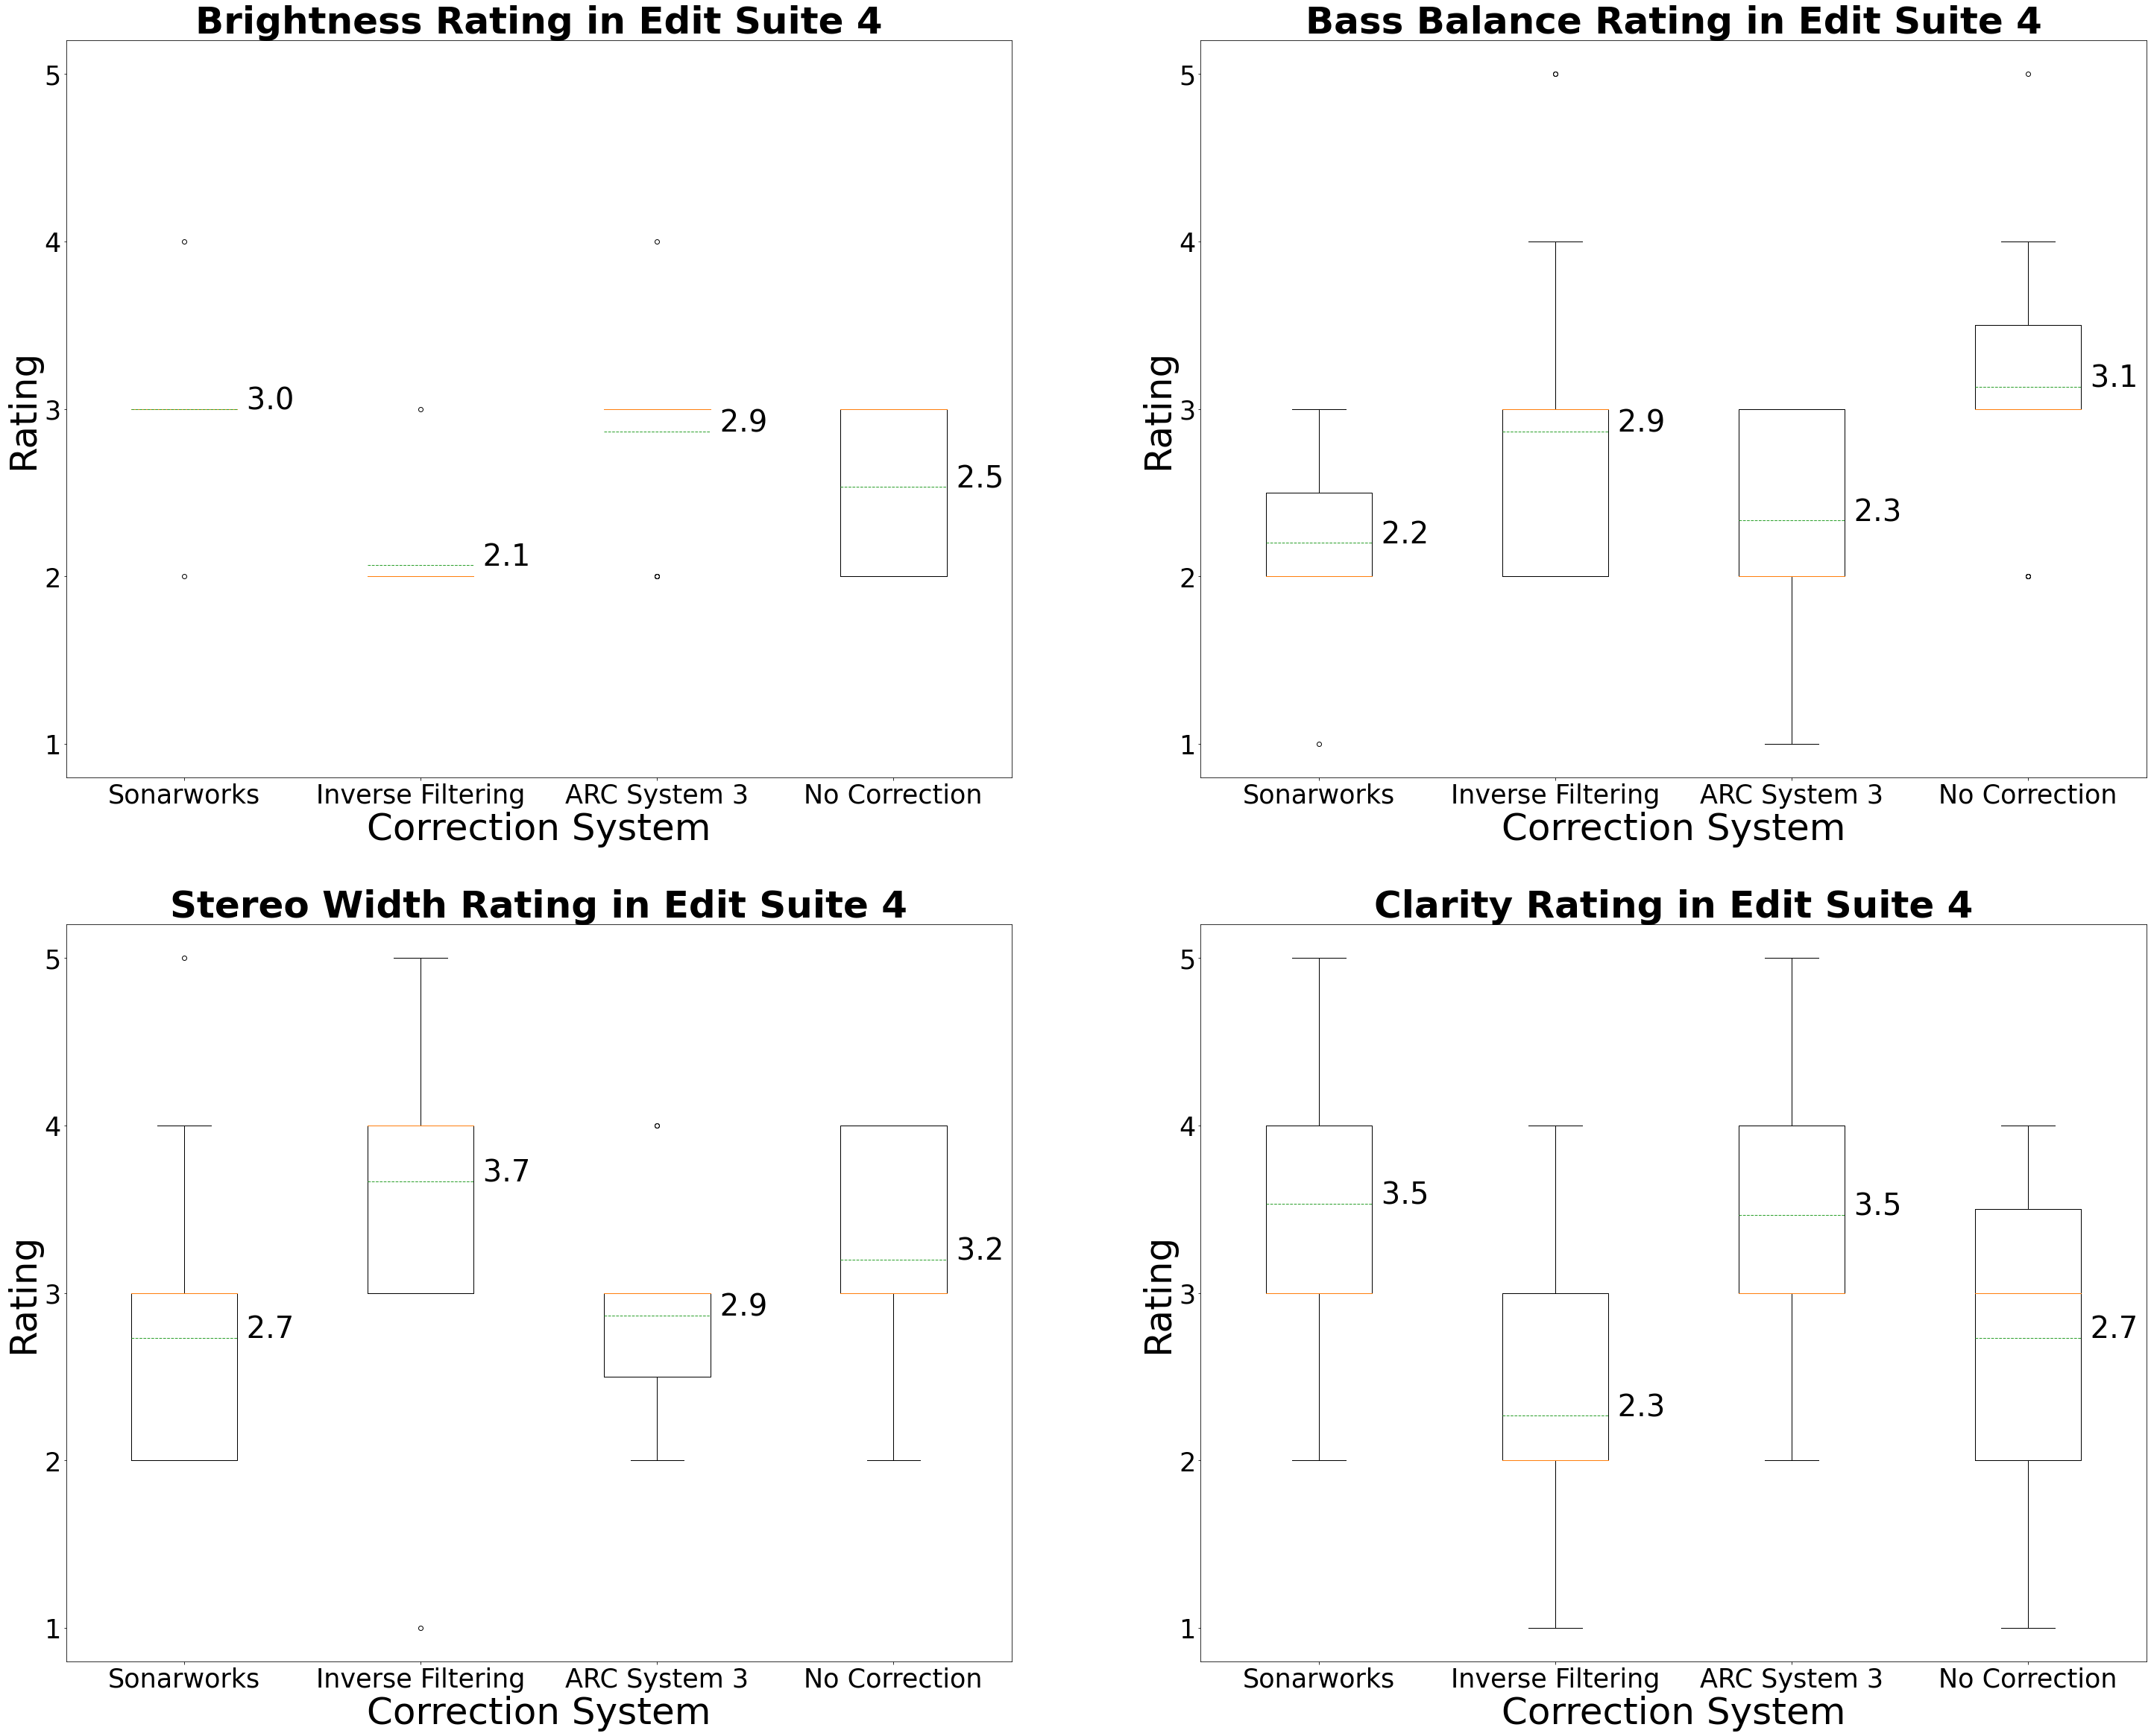

In [ ]:
import matplotlib.ticker as ticker
from pylab import *

Brightness = [Brightness_System1,Brightness_System2,Brightness_System3,Brightness_System4]
Brightness = splitList(Brightness,2)
Bass = [Bass_System1,Bass_System2,Bass_System3,Bass_System4]
Bass = splitList(Bass,2)
Stereo = [Stereo_System1,Stereo_System2,Stereo_System3,Stereo_System4]
Stereo = splitList(Stereo,2)
Clarity = [Clarity_System1,Clarity_System2,Clarity_System3,Clarity_System4]
Clarity = splitList(Clarity,2)
labels = ['Sonarworks', 'Inverse Filtering', 'ARC System 3', 'No Correction']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(50, 40))

# rectangular box plot
brightMeans=np.mean(Brightness,axis=1)
bplot1 = ax1.boxplot(Brightness,
                     vert=True,  # vertical box alignment
                     showmeans=True,meanline=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax1.set_title('Brightness Rating in Edit Suite 4',fontweight="bold", size=50)

count=0
for line in bplot1['means']:
    # get position data for median line
    x, y = line.get_xydata()[1] # top of median line
    # overlay median value
    ax1.text(x, y, ' %.1f' % brightMeans[count],
         horizontalalignment='left',fontsize = 40.0) # draw above, centered
    count=count+1

bassMeans=np.mean(Bass,axis=1)
bplot2 = ax2.boxplot(Bass,
                     vert=True,  # vertical box alignment
                     showmeans=True,meanline=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax2.set_title('Bass Balance Rating in Edit Suite 4',fontweight="bold", size=50)

count=0
for line in bplot2['means']:
    # get position data for median line
    x, y = line.get_xydata()[1] # top of median line
    # overlay median value
    ax2.text(x, y, ' %.1f' % bassMeans[count],
         horizontalalignment='left',fontsize = 40.0) # draw above, centered
    count=count+1


stereoMeans=np.mean(Stereo,axis=1)
bplot3 = ax3.boxplot(Stereo,
                     vert=True,  # vertical box alignment
                     showmeans=True,meanline=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax3.set_title('Stereo Width Rating in Edit Suite 4',fontweight="bold", size=50)

count=0
for line in bplot3['means']:
    # get position data for median line
    x, y = line.get_xydata()[1] # top of median line
    # overlay median value
    ax3.text(x, y, ' %.1f' % stereoMeans[count],
         horizontalalignment='left',fontsize = 40.0) # draw above, centered
    count=count+1


clarityMeans=np.mean(Clarity,axis=1)
bplot4 = ax4.boxplot(Clarity,
                     vert=True,  # vertical box alignment
                     showmeans=True,meanline=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax4.set_title('Clarity Rating in Edit Suite 4',fontweight="bold", size=50)

count=0
for line in bplot4['means']:
    # get position data for median line
    x, y = line.get_xydata()[1] # top of median line
    # overlay median value
    ax4.text(x, y, ' %.1f' % clarityMeans[count],
         horizontalalignment='left',fontsize = 40.0) # draw above, centered
    count=count+1


for ax in [ax1, ax2, ax3, ax4]:
    ax.yaxis.grid(False)
    ax.set_xlabel('Correction System',fontsize = 50.0)
    ax.set_ylabel('Rating',fontsize = 50.0)
    ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=35)
    ax.axis(ymin=0.8,ymax=5.2)
    
plt.savefig('Plots For Edit Suite 4.png',dpi=400)

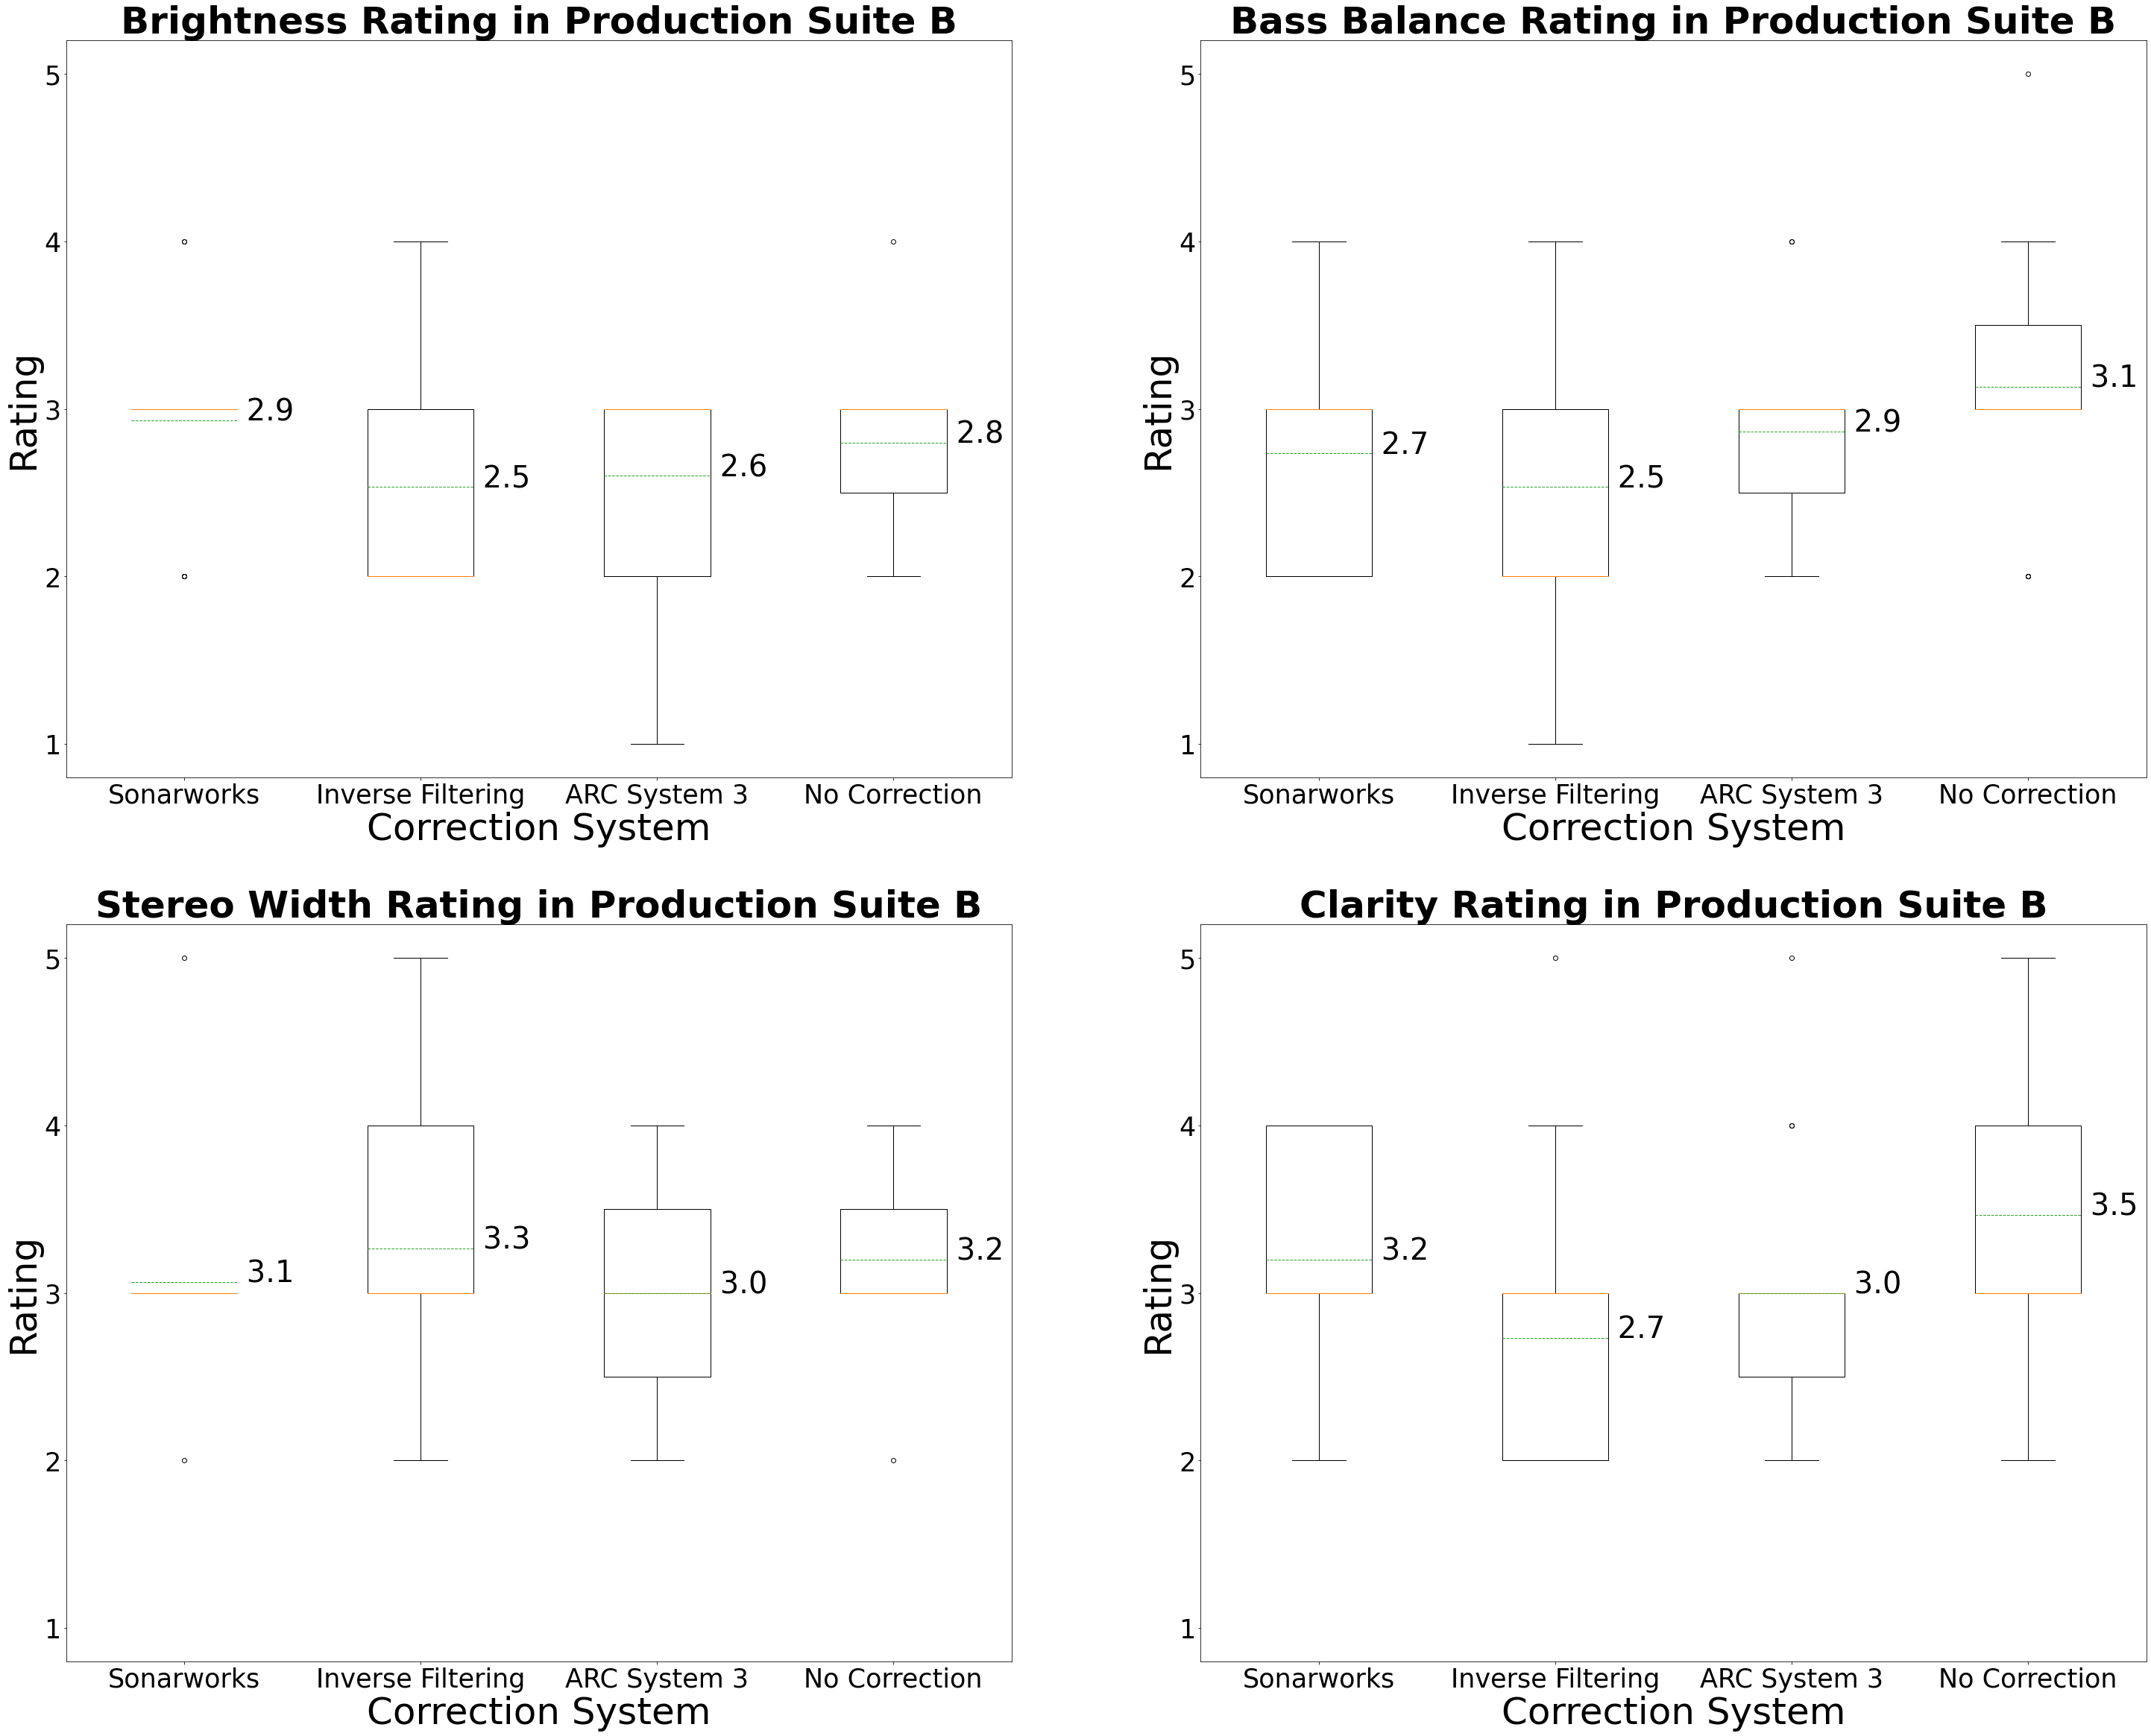

In [ ]:
import matplotlib.ticker as ticker
from pylab import *

Brightness = [Brightness_System1,Brightness_System2,Brightness_System3,Brightness_System4]
Brightness = splitList(Brightness,3)
Bass = [Bass_System1,Bass_System2,Bass_System3,Bass_System4]
Bass = splitList(Bass,3)
Stereo = [Stereo_System1,Stereo_System2,Stereo_System3,Stereo_System4]
Stereo = splitList(Stereo,3)
Clarity = [Clarity_System1,Clarity_System2,Clarity_System3,Clarity_System4]
Clarity = splitList(Clarity,3)
labels = ['Sonarworks', 'Inverse Filtering', 'ARC System 3', 'No Correction']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(50, 40))

# rectangular box plot
brightMeans=np.mean(Brightness,axis=1)
bplot1 = ax1.boxplot(Brightness,
                     vert=True,  # vertical box alignment
                     showmeans=True,meanline=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax1.set_title('Brightness Rating in Production Suite B',fontweight="bold", size=50)

count=0
for line in bplot1['means']:
    # get position data for median line
    x, y = line.get_xydata()[1] # top of median line
    # overlay median value
    ax1.text(x, y, ' %.1f' % brightMeans[count],
         horizontalalignment='left',fontsize = 40.0) # draw above, centered
    count=count+1

bassMeans=np.mean(Bass,axis=1)
bplot2 = ax2.boxplot(Bass,
                     vert=True,  # vertical box alignment
                     showmeans=True,meanline=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax2.set_title('Bass Balance Rating in Production Suite B',fontweight="bold", size=50)

count=0
for line in bplot2['means']:
    # get position data for median line
    x, y = line.get_xydata()[1] # top of median line
    # overlay median value
    ax2.text(x, y, ' %.1f' % bassMeans[count],
         horizontalalignment='left',fontsize = 40.0) # draw above, centered
    count=count+1


stereoMeans=np.mean(Stereo,axis=1)
bplot3 = ax3.boxplot(Stereo,
                     vert=True,  # vertical box alignment
                     showmeans=True,meanline=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax3.set_title('Stereo Width Rating in Production Suite B',fontweight="bold", size=50)

count=0
for line in bplot3['means']:
    # get position data for median line
    x, y = line.get_xydata()[1] # top of median line
    # overlay median value
    ax3.text(x, y, ' %.1f' % stereoMeans[count],
         horizontalalignment='left',fontsize = 40.0) # draw above, centered
    count=count+1


clarityMeans=np.mean(Clarity,axis=1)
bplot4 = ax4.boxplot(Clarity,
                     vert=True,  # vertical box alignment
                     showmeans=True,meanline=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax4.set_title('Clarity Rating in Production Suite B',fontweight="bold", size=50)

count=0
for line in bplot4['means']:
    # get position data for median line
    x, y = line.get_xydata()[1] # top of median line
    # overlay median value
    ax4.text(x, y, ' %.1f' % clarityMeans[count],
         horizontalalignment='left',fontsize = 40.0) # draw above, centered
    count=count+1


for ax in [ax1, ax2, ax3, ax4]:
    ax.yaxis.grid(False)
    ax.set_xlabel('Correction System',fontsize = 50.0)
    ax.set_ylabel('Rating',fontsize = 50.0)
    ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    ax.tick_params(axis='both', which='major', labelsize=35)
    ax.axis(ymin=0.8,ymax=5.2)

plt.savefig('Plots For Production Suite B.png',dpi=400)